## Caso k-Means x GMM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.metrics import adjusted_rand_score

## Base de dados

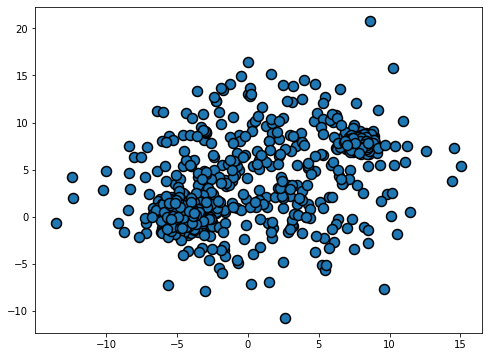

In [2]:
n_samples = 1000

varied = datasets.make_blobs(n_samples = n_samples, cluster_std = [5, 1, 0.5], random_state = 3)

X, y = varied[0], varied[1]

plt.figure( figsize=(8,6))
plt.scatter(X[:,0], X[:,1], edgecolor = 'black', lw = 1.5, s = 100, cmap = plt.get_cmap('viridis'))
plt.show()

## k-Means

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)

pred = kmeans.fit_predict(X)

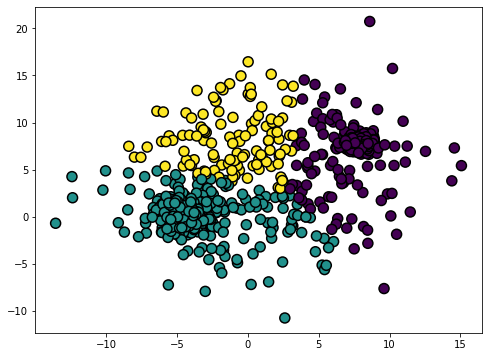

In [47]:
plt.figure( figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = pred, edgecolor='black', lw = 1.5, s = 100, cmap = plt.get_cmap('viridis'))
plt.show()

## GMM

In [48]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3)

gmm = gmm.fit(X)

pred_gmm = gmm.predict(X)

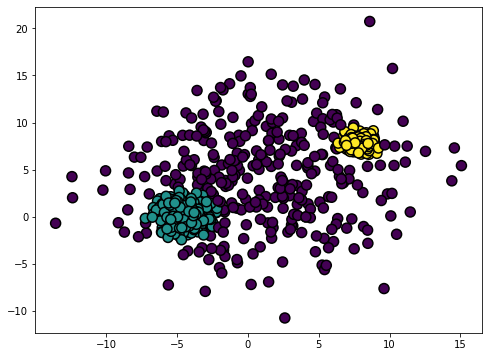

In [49]:
plt.figure( figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c = pred_gmm, edgecolor = 'black', lw = 1.5, s = 100, cmap = plt.get_cmap('viridis'))
plt.show()

## Comparativo k-Means x GMM

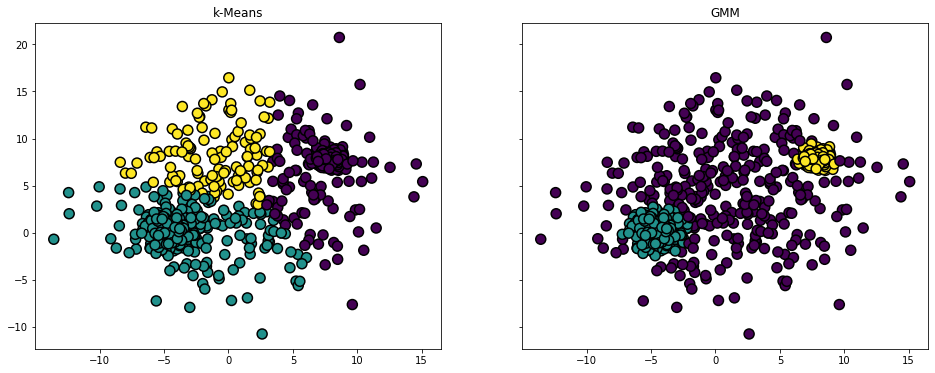

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,6))
ax1.set_title('k-Means')
ax1.scatter(X[:,0], X[:,1], c = kmeans.labels_, edgecolor = 'black', lw = 1.5, s = 100, cmap = plt.get_cmap('viridis'))
ax2.set_title('GMM')
ax2.scatter(X[:,0], X[:,1], c = pred_gmm, edgecolor = 'black', lw = 1.5, s = 100, cmap = plt.get_cmap('viridis'))

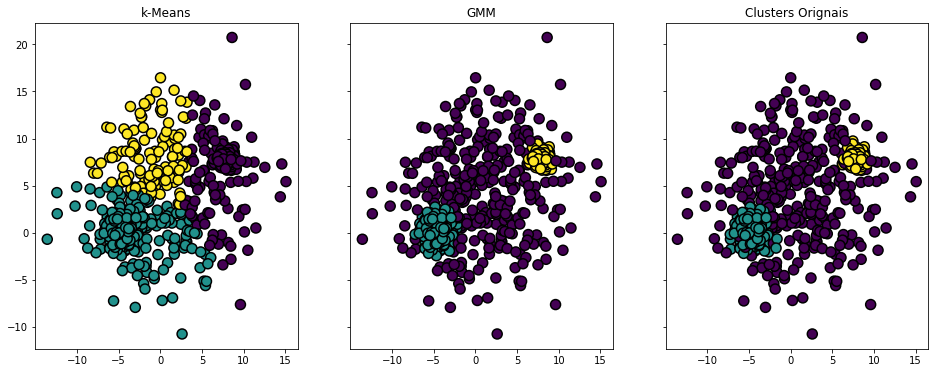

In [51]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,6))
ax1.set_title('k-Means')
ax1.scatter(X[:,0], X[:,1], c = kmeans.labels_, edgecolor = 'black', lw = 1.5, s = 100, cmap = plt.get_cmap('viridis'))
ax2.set_title('GMM')
ax2.scatter(X[:,0], X[:,1], c = pred_gmm, edgecolor = 'black', lw = 1.5, s = 100, cmap = plt.get_cmap('viridis'))
ax3.set_title('Clusters Orignais')
ax3.scatter(X[:,0], X[:,1], c = y, edgecolor = 'black', lw = 1.5, s = 100, cmap = plt.get_cmap('viridis'))

## Precisão k-Means (considerando que os labels corretos sejam do GMM)

In [52]:
kmeans_acc = kmeans_score = adjusted_rand_score(kmeans.labels_, y)

print('A precisão do algoritmo k-Means é:', kmeans_acc)

A precisão do algoritmo k-Means é: 0.5361739479175923


## Precisão GMM (considerando que os labels corretos sejam do GMM)

In [53]:
gmm_acc = adjusted_rand_score(pred_gmm, y)

print('A precisão do algoritmo GMM é:', gmm_acc)

A precisão do algoritmo GMM é: 0.9129496875073981
